In [1]:
%%capture
%pip install matplotlib

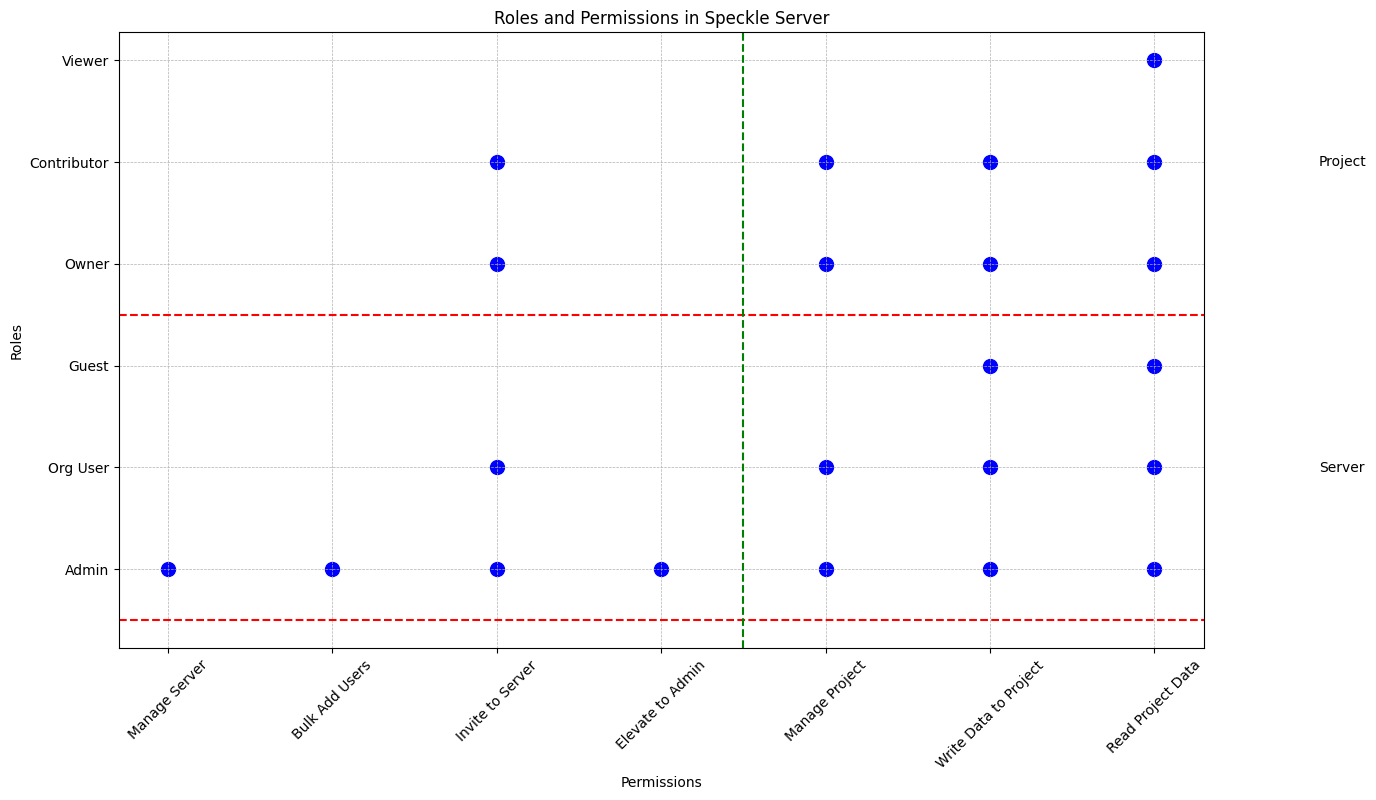

In [12]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Re-initialize the roles, permissions, and matrix based on the discussion
roles = ['Admin', 'Org User', 'Guest', 'Owner', 'Contributor', 'Viewer']
permissions = ['Manage Server', 'Bulk Add Users', 'Invite to Server', 'Elevate to Admin', 'Manage Project', 'Write Data to Project', 'Read Project Data',]
user_classes = ['Server', 'Server', 'Server', 'Project', 'Project', 'Project']

# Initialize the matrix based on the discussion
matrix = np.array([
    [1, 1, 1, 1, 1, 1, 1],  # Admin
    [0, 0, 1, 0, 1, 1, 1],  # Org User
    [0, 0, 0, 0, 0, 1, 1],  # Guest
    [0, 0, 1, 0, 1, 1, 1],  # Owner
    [0, 0, 1, 0, 1, 1, 1],  # Contributor
    [0, 0, 0, 0, 0, 0, 1]   # Viewer
])

# Create the chart
plt.figure(figsize=(14, 8))

# Plot circles based on the matrix values
for i in range(len(roles)):
    for j in range(len(permissions)):
        if matrix[i, j] == 1:
            plt.scatter(j, i, color='blue', s=100, marker='o')

# Add text labels for user classes
for i, user_class in enumerate(set(user_classes)):
    y_values = [y for y, class_name in enumerate(user_classes) if class_name == user_class]
    plt.text(len(permissions), np.mean(y_values), user_class, verticalalignment='center')

plt.yticks(np.arange(len(roles)), roles)
plt.xticks(np.arange(len(permissions)), permissions, rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.title('Roles and Permissions in Speckle Server')
plt.xlabel('Permissions')
plt.ylabel('Roles')

# Add lines to separate user classes
prev_class = None
for i, user_class in enumerate(user_classes):
    if user_class != prev_class:
        plt.axhline(y=i-0.5, color='red', linestyle='--')
    prev_class = user_class

# Add lines to separate server and project operations
plt.axvline(x=3.5, color='green', linestyle='--')

plt.show()
